<a href="https://colab.research.google.com/github/ndegwaanth/AirBnB_clone/blob/master/Fraud_detection_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARY IMPORT**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

**DATA LOADING**

In [3]:
df =  pd.read_csv("credit_card_fraud_dataset.csv")
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [4]:
df.shape

(100000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [6]:
df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [7]:
df.isnull().sum()

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')

In [11]:
df.IsFraud

,IsFraud
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [20]:
df['TransactionDate'] = pd.to_datetime(df["TransactionDate"])
df["Year"] = pd.DatetimeIndex(df["TransactionDate"]).year
df["Month"] = pd.DatetimeIndex(df["TransactionDate"]).month
df["Day"] = pd.DatetimeIndex(df["TransactionDate"]).day
df["Hour"] = pd.DatetimeIndex(df["TransactionDate"]).hour
df["Minute"] = pd.DatetimeIndex(df["TransactionDate"]).minute
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour,Minute
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,3,14,15
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,19,13,20
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,8,10,8
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,13,23,50
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,12,18,51


In [24]:
print(df.dtypes)

TransactionID               int64
TransactionDate    datetime64[ns]
Amount                    float64
MerchantID                  int64
TransactionType            object
Location                   object
IsFraud                     int64
Year                        int32
Month                       int32
Day                         int32
Hour                        int32
Minute                      int32
dtype: object


In [25]:
le_transanction = LabelEncoder()
le_location = LabelEncoder()
le_merchant = LabelEncoder()

df["TransactionType"] = le_transanction.fit_transform(df['TransactionType'])
df["Location"] = le_location.fit_transform(df["Location"])
df["MerchantID"] = le_merchant.fit_transform(df["MerchantID"])

**SPLITING THE DATASET AND FITTING THE MODEL**

In [26]:
X = df.drop(columns=['IsFraud', 'TransactionDate'])
y = df['IsFraud']

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

PREDICTIONS

In [31]:
y_pred = clf.predict(X_test)
data = pd.DataFrame(y_pred)
data.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


**MODEL EVALUATION**

In [33]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\n Confusion matrix \n", confusion_matrix(y_test, y_pred))
print("\n Classification Report \n", classification_report(y_test,y_pred))

Accuracy:  0.98925

 Confusion matrix 
 [[19785     2]
 [  213     0]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.00      0.00      0.00       213

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000



VISUALIZATION OF THE DECISION TREE

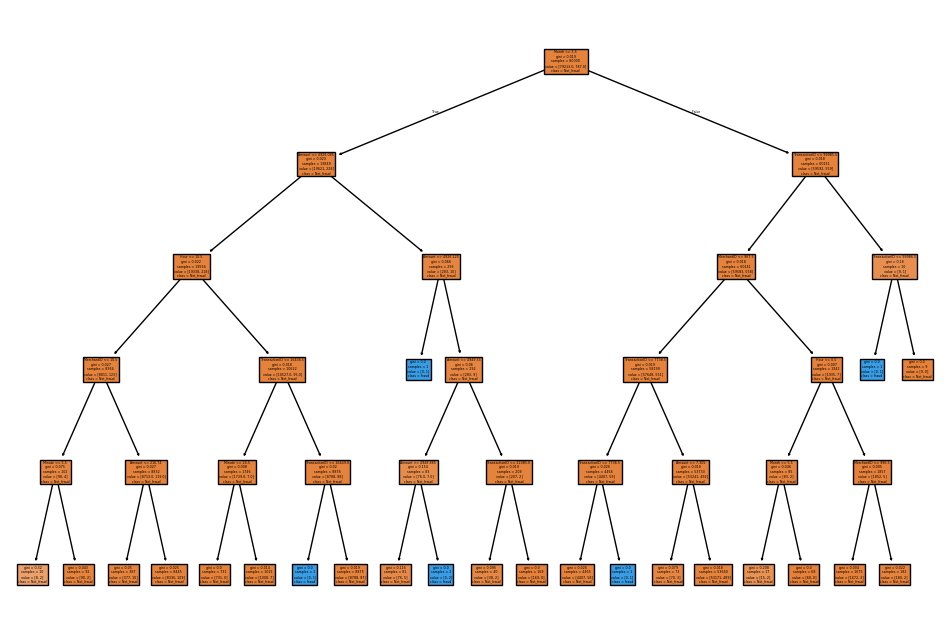

In [35]:
plt.figure(figsize = (12, 8))
plot_tree(clf, feature_names = X.columns, class_names=['Not_fraud', "fraud"], filled=True)
plt.show()